# Homework 11 by xy1002

1.. Find the census tract shape files online (American Fact Finder has them), http://www1.nyc.gov/ has them. The folder you should download is names nycb2010_16d. Load it as a geopandas file

In [1]:
%matplotlib inline
import shapely
from geopandas import GeoDataFrame
import matplotlib.pylab as pl
from fiona.crs import from_epsg
import os
import zipfile

if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

In [2]:
!curl -O "http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycb2010_16d.zip"
os.system("mv nycb2010_16d.zip " + os.getenv("PUIDATA")) 
zf = zipfile.ZipFile(os.getenv("PUIDATA") + '/' + "nycb2010_16d.zip") 
zf.extractall(os.getenv("PUIDATA")) 
zf.close 
ct_shape = GeoDataFrame.from_file(os.getenv("PUIDATA") + '/' + 'nycb2010_16d/nycb2010.shp')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5616k  100 5616k    0     0  13.7M      0 --:--:-- --:--:-- --:--:-- 14.7M


In [3]:
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,"POLYGON ((963363.1168212891 167356.3336181641,..."
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((960069.9965820312 161953.6936035156,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((963023.891784668 158246.7521972656, ..."


2.. Extract only the Brooklyn shape polygons and convert the coordinates to lat/lon

In [4]:
ct_latlon = ct_shape[ct_shape['BoroCode'] == '3']
ct_latlon.reset_index(drop=True, inplace=True)
ct_latlon.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,"POLYGON ((982421.0634155273 178133.8510131836,..."
1,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,"POLYGON ((985596.1882324219 193858.6517944336,..."
2,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,"POLYGON ((986271.9053955078 193612.9270019531,..."
3,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,"POLYGON ((988369.8604125977 192442.1943969727,..."
4,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,"POLYGON ((988949.616394043 193714.8265991211, ..."


In [5]:
ct_latlon.crs = from_epsg(2263)
ct_latlon = ct_latlon.to_crs(epsg = 4326)
# epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US feet
ct_latlon.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,POLYGON ((-74.00659158337982 40.65561273365177...
1,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384567195...
2,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,POLYGON ((-73.99270830309769 40.69809925981344...
3,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,POLYGON ((-73.98514306089652 40.69488514296981...
4,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,POLYGON ((-73.98305147125492 40.69837793354038...


3.. Find the coordinates of CUSP: 1 MetroTech Brooklyn. Create a Point shapely geometry with the coordinates of CUSP


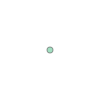

In [6]:
CUSP = shapely.geometry.Point(-73.986153, 40.694378)
CUSP

4.. Loop over the Brookly polygons (nearly 10000) and assess find in which geometry the polygon is contained

In [7]:
# - ct_latlon.geometry (the polygons you are looping over)
# - shapely.geometry.asShape(<the polygon>).contain(<the point>)
# - save the index of the polygon that contains the CUSP
for i, ct in zip(ct_latlon.index, ct_latlon.geometry):
    if shapely.geometry.asShape(ct_latlon.geometry.iloc[i]).contains(CUSP):
        print('CUSP is contained in', ct)
        index = i
    


CUSP is contained in POLYGON ((-73.98514306089652 40.69488514296981, -73.98516822415829 40.69435907630051, -73.98615943608057 40.69437490429107, -73.98616900025644 40.69492406481108, -73.98514306089652 40.69488514296981))


5.. Plot one every 10 polygons of brooklyn (using the geopandas datafame method plot) and overplot the location of cusp as a point (using pylab.scatter) Overplot also the census track that contains cusp in red (using the geopandas datafame method plot)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


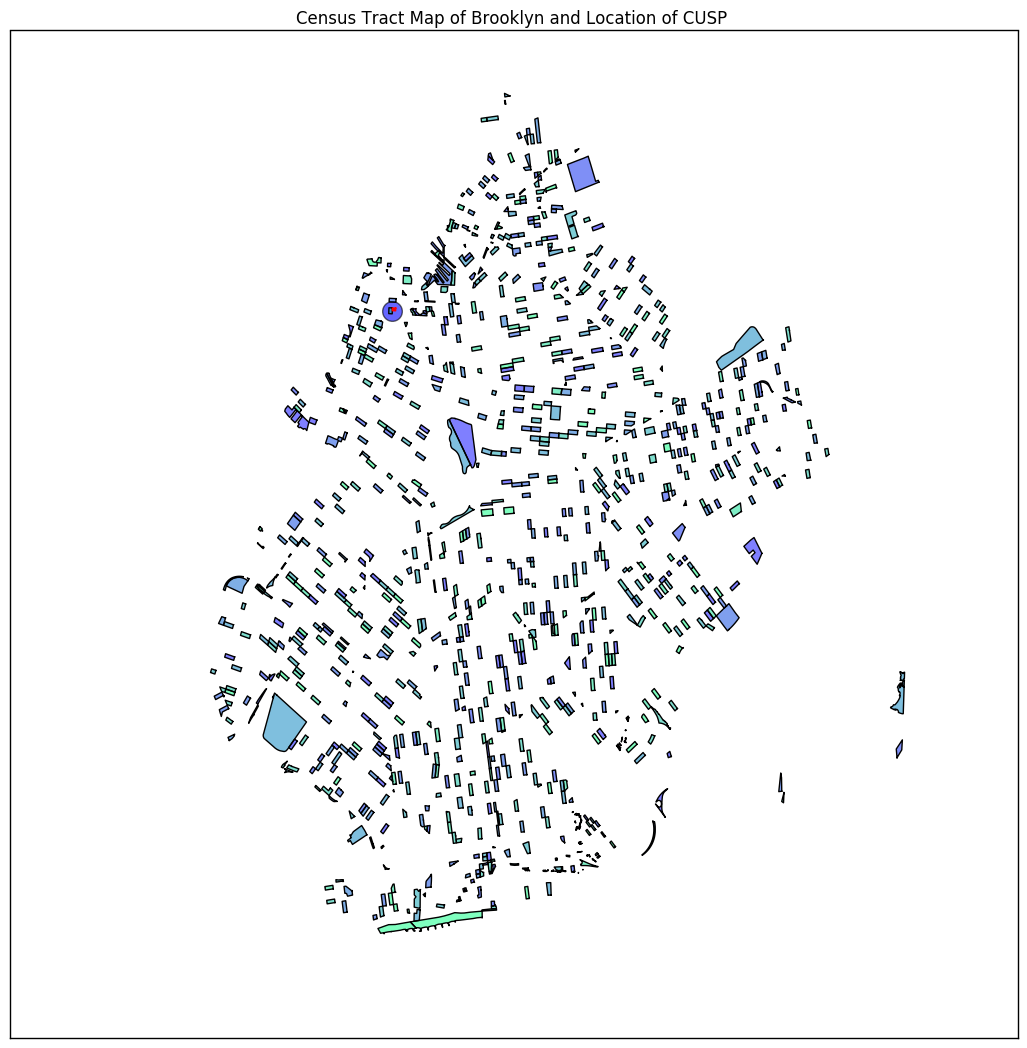

In [53]:
f, ax = pl.subplots(figsize=(13,13))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_latlon[0::10].plot(ax=ax, colormap = 'winter')
pl.scatter(CUSP.x, CUSP.y, s = 200, marker = 'o', alpha = 0.6)
ct_latlon[ct_latlon.index == index].plot(color = 'red', c = 'red', ax = ax, alpha = 1)
pl.title("Census Tract Map of Brooklyn and Location of CUSP ")

## Figure 1: Cusp Location on Brooklyn Census Tract Map